In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [14]:
df = pd.read_csv("cervicalcancer.csv")
df.shape

(72, 20)

In [15]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [16]:
df.tail()


,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0
71,10,14,14,6,12,7,8,5,15,12,10,10,13,11,9,14,13,15,15,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [18]:
df.ca_cervix.value_counts()

0    51
1    21
Name: ca_cervix, dtype: int64

In [19]:
df.ca_cervix.value_counts(normalize=True)

0    0.708333
1    0.291667
Name: ca_cervix, dtype: float64

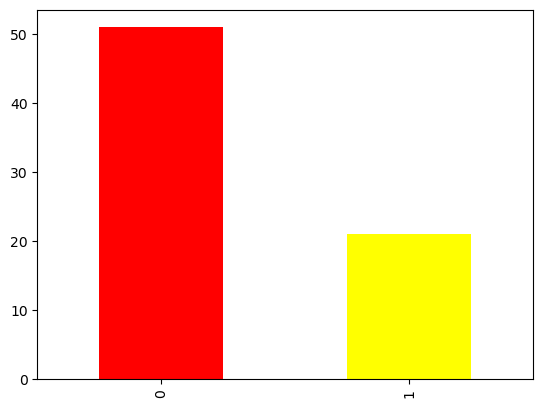

In [20]:
df.ca_cervix.value_counts().plot(kind="bar", color=["red", "yellow"]);

In [21]:
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

In [22]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [23]:
df.norm_significantPerson.value_counts()

5    32
1    27
3     6
2     4
4     3
Name: norm_significantPerson, dtype: int64

In [24]:
pd.crosstab(df.ca_cervix,df.norm_significantPerson)

norm_significantPerson,1,2,3,4,5
ca_cervix,,,,,
0,15,2,5,2,27
1,12,2,1,1,5


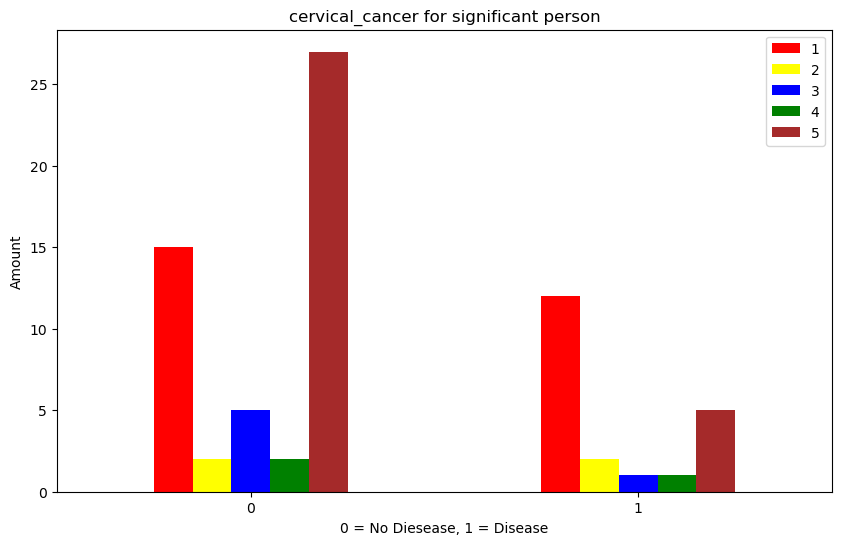

In [27]:
pd.crosstab(df.ca_cervix, df.norm_significantPerson).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["red", "yellow","blue","green","brown"])

plt.title("cervical_cancer for significant person")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["1","2","3","4","5"]);
plt.xticks(rotation=0);

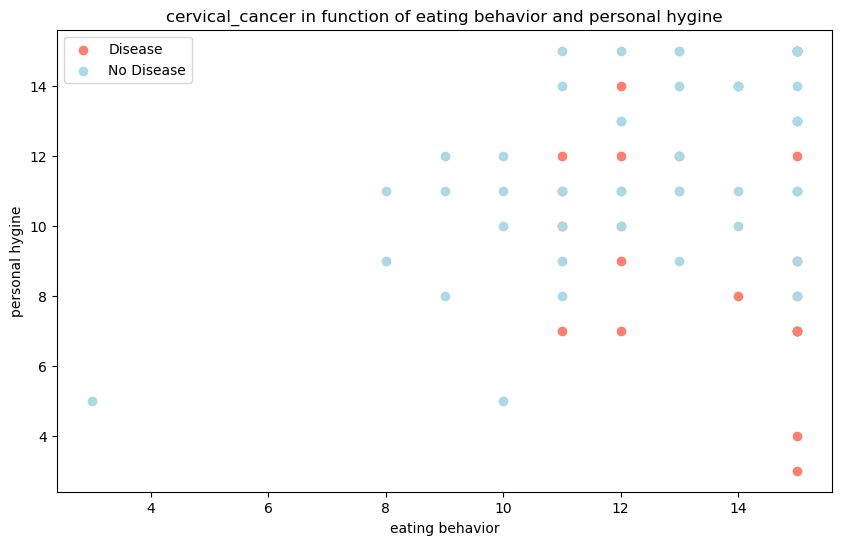

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df.behavior_eating[df.ca_cervix==1],
            df.behavior_personalHygine[df.ca_cervix==1],
            c="salmon")
plt.scatter(df.behavior_eating[df.ca_cervix==0],
            df.behavior_personalHygine[df.ca_cervix==0],
            c="lightblue")
plt.title("cervical_cancer in function of eating behavior and personal hygine")
plt.xlabel("eating behavior")
plt.ylabel("personal hygine")
plt.legend(["Disease", "No Disease"]);

In [32]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


(20.5, -0.5)

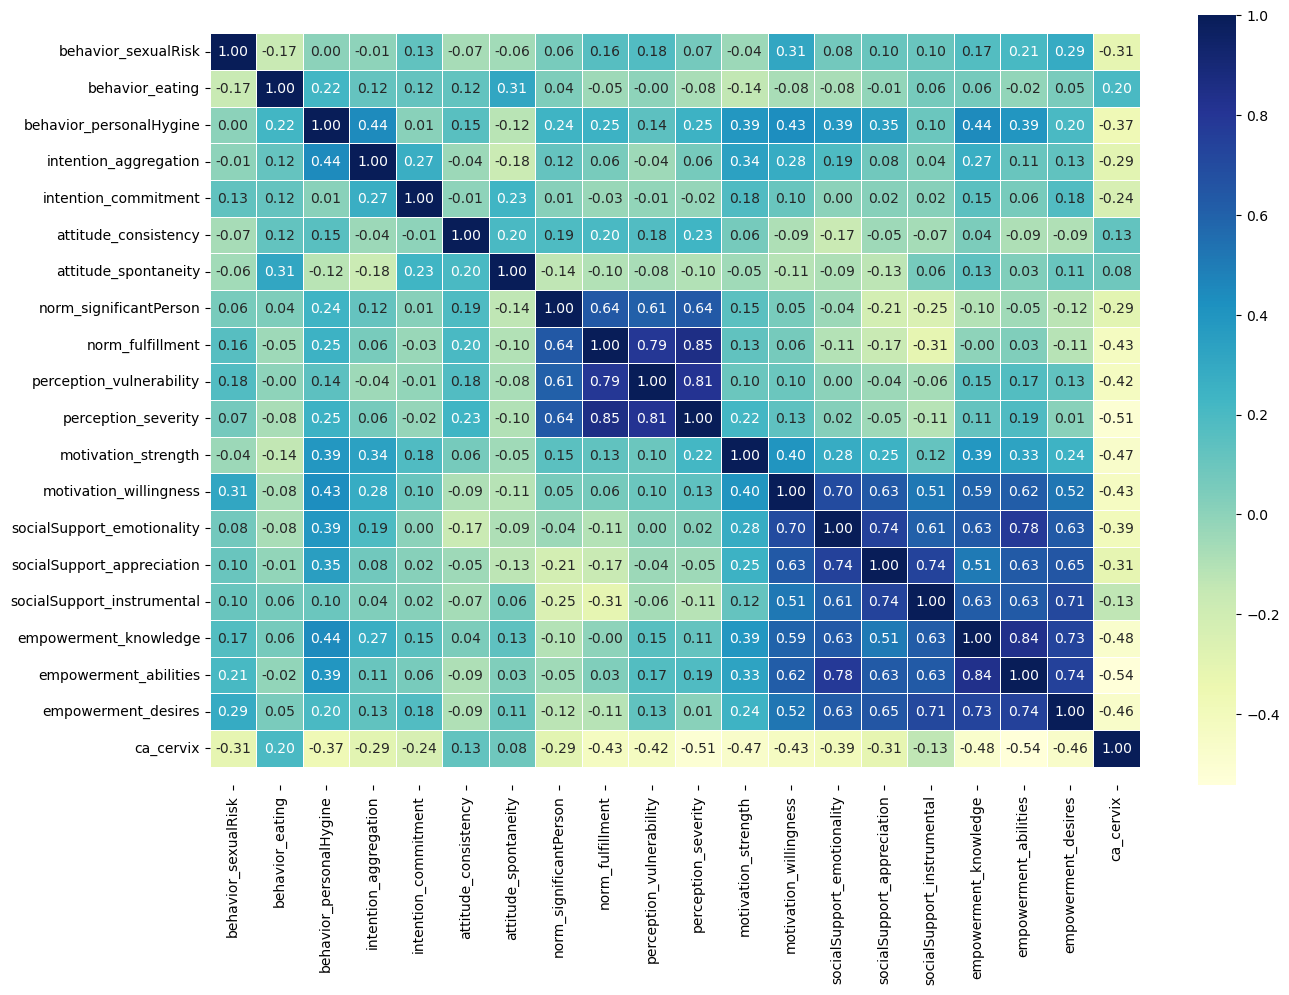

In [33]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [34]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [39]:
X=df.drop("ca_cervix",axis=1)
y=df.ca_cervix.values

In [40]:
X.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7


In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [41]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [42]:
X_train.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
22,10,13,14,10,15,6,8,1,5,5,2,15,10,12,8,15,15,15,15
56,10,10,5,2,15,8,10,5,13,15,10,15,3,3,2,13,15,15,15
49,6,15,11,10,12,8,10,5,14,13,10,15,7,5,2,5,13,9,3
33,10,11,10,9,15,5,10,3,3,3,2,11,11,9,4,9,15,15,15
39,10,14,14,10,11,5,9,1,5,4,2,14,15,11,8,14,13,13,13


In [43]:
y_train,len(y_train)

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]),
 57)

In [44]:
X_test.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7
62,10,13,11,6,15,8,10,5,15,7,10,13,7,3,5,3,3,3,3
18,10,11,12,2,10,8,8,2,10,8,7,6,5,3,2,4,4,4,3
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
28,10,11,11,10,14,5,8,1,4,3,4,15,11,13,9,13,13,12,13


In [45]:
y_test,len(y_test)

(array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]), 15)

In [46]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/madhavmaheshwari/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.8,
 'Logistic Regression': 0.8666666666666667,
 'Random Forest': 0.8666666666666667}

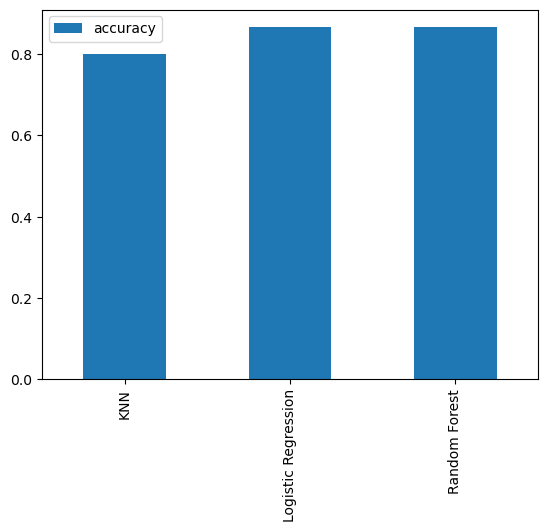

In [48]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [49]:
train_scores = []
test_scores = []
neighbors = range(1, 21) # 1 to 20
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [50]:
train_scores

[1.0,
 0.9473684210526315,
 0.9473684210526315,
 0.8947368421052632,
 0.9122807017543859,
 0.8245614035087719,
 0.8947368421052632,
 0.8421052631578947,
 0.8421052631578947,
 0.8245614035087719,
 0.8771929824561403,
 0.8596491228070176,
 0.8596491228070176,
 0.8596491228070176,
 0.8596491228070176,
 0.8421052631578947,
 0.8947368421052632,
 0.8421052631578947,
 0.8947368421052632,
 0.8421052631578947]

In [51]:
test_scores

[0.9333333333333333,
 0.7333333333333333,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.8,
 0.7333333333333333,
 0.8666666666666667,
 0.7333333333333333,
 0.8,
 0.8,
 0.8,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333]

Maximum KNN score on the test data: 93.33%


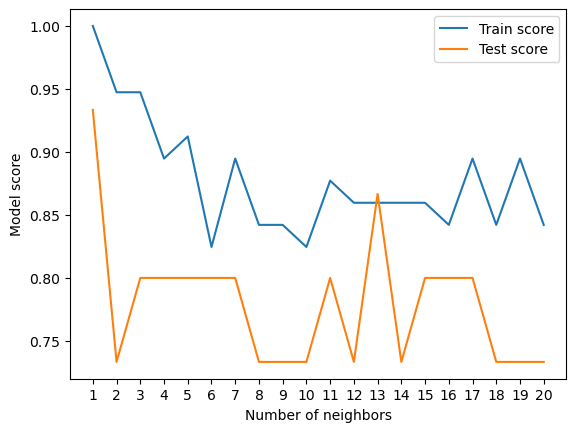

In [52]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [53]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [54]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [55]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [56]:
rs_log_reg.score(X_test, y_test)


0.8666666666666667

In [57]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [58]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [59]:
rs_rf.score(X_test, y_test)

0.8

In [60]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [62]:
gs_log_reg.score(X_test, y_test)

0.8666666666666667

In [63]:
y_preds = gs_log_reg.predict(X_test)

In [64]:
y_preds

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [65]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

/Users/madhavmaheshwari/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


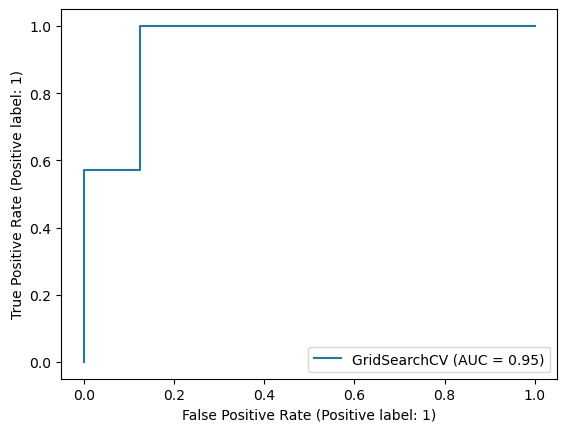

In [66]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [67]:
print(confusion_matrix(y_test, y_preds))

[[7 1]
 [1 6]]


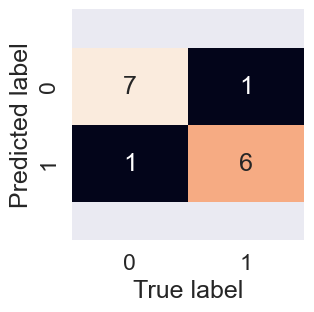

In [68]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



In [70]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [71]:
clf = LogisticRegression(C=0.08858667904100823,
                         solver="liblinear")

In [72]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.93333333, 0.8       , 1.        , 0.92857143, 0.92857143])

In [73]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9180952380952382

In [74]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9333333333333332

In [75]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.76

In [76]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.834920634920635

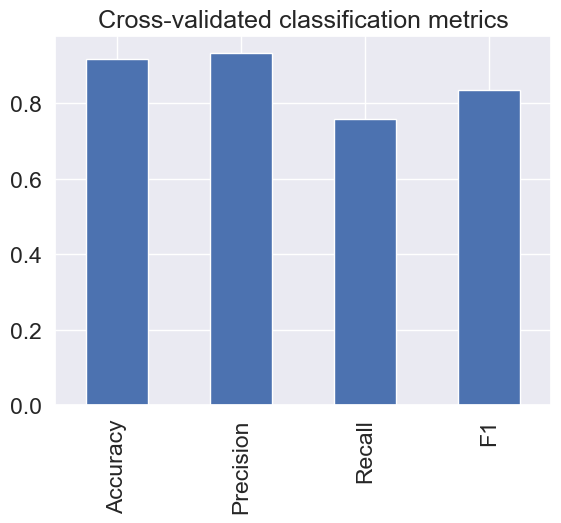

In [77]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [78]:
clf = LogisticRegression(C=0.08858667904100823,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [79]:
clf.coef_

array([[ 0.05796025,  0.3786806 , -0.01186915, -0.08793472, -0.09340559,
         0.26846323,  0.13476132,  0.01480141, -0.15415604, -0.07031289,
        -0.32414691, -0.12754778,  0.09132657,  0.10464551, -0.01187879,
         0.20635598, -0.24727309, -0.25320591, -0.23520073]])

In [80]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [81]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict


{'behavior_sexualRisk': 0.05796024553215597,
 'behavior_eating': 0.37868059833892065,
 'behavior_personalHygine': -0.011869152777500402,
 'intention_aggregation': -0.08793472345126534,
 'intention_commitment': -0.09340558597919162,
 'attitude_consistency': 0.26846323140178846,
 'attitude_spontaneity': 0.13476131917927198,
 'norm_significantPerson': 0.014801407851830676,
 'norm_fulfillment': -0.15415603530208466,
 'perception_vulnerability': -0.07031289248615773,
 'perception_severity': -0.3241469072160028,
 'motivation_strength': -0.12754777879246998,
 'motivation_willingness': 0.0913265655479356,
 'socialSupport_emotionality': 0.10464551081796174,
 'socialSupport_appreciation': -0.011878792077997479,
 'socialSupport_instrumental': 0.20635597983015785,
 'empowerment_knowledge': -0.24727309147039322,
 'empowerment_abilities': -0.25320590661439274,
 'empowerment_desires': -0.23520073439125486}

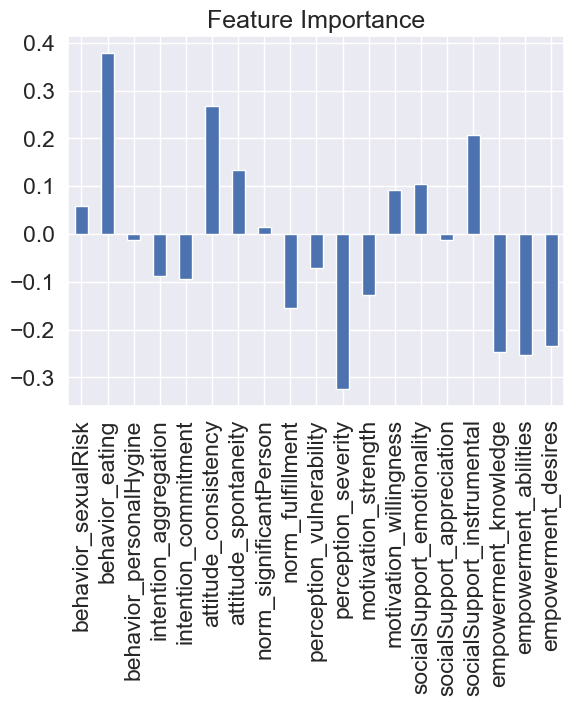

In [82]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [83]:
pd.crosstab(df.perception_severity,df.ca_cervix)

ca_cervix,0,1
perception_severity,,
2,15,14
3,1,2
4,3,4
6,3,0
7,0,1
8,9,0
9,4,0
10,16,0


In [84]:
pd.crosstab(df.behavior_eating,df.ca_cervix)

ca_cervix,0,1
behavior_eating,,
3,1,0
8,2,0
9,3,0
10,4,0
11,6,4
12,7,4
13,7,1
14,5,1
15,16,11
